Import Required Libraries

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings

#configuring display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

Downloading the Dataset from kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

print("Path to dataset files:", path)
print("Dataset Downloaded Successfully!")

Using Colab cache for faster access to the 'imdb-dataset-of-top-1000-movies-and-tv-shows' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows
Dataset Downloaded Successfully!


Loading dataset into a DataFrame

In [3]:
#Find the downloaded CSV or dataset in the directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print('The available CSV files:', csv_files)

#load the CSV file
csv_path = os.path.join(path, csv_files[0])
df = pd.read_csv(csv_path)

print(f"\nDataset Loaded Successfully!")
print(f"File name {csv_files[0]}")
print(f"Shape: {df.shape[0]} rows and {df.shape[1]} Columns")



The available CSV files: ['imdb_top_1000.csv']

Dataset Loaded Successfully!
File name imdb_top_1000.csv
Shape: 1000 rows and 16 Columns


Data Preview

In [4]:
#the purpose of this; is to understand the first few rows and also understand the structure
print("first Five Rows of the dataset:")
print("="*80)
display(df.head())

print("\n" + "="*80)
print("Last Five Rows of the dataset:")
print("="*80)
display(df.tail())



first Five Rows of the dataset:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"



Last Five Rows of the dataset:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


Dataset Information and structure: Helps plan data cleaning strategy

In [5]:
print("Dataset information:")
print("="*80)
df.info()

print("\n" + "="*80)
print("Column Names:")
print("="*80)
for i, col in enumerate(df.columns, 1):
  print(f"{i}. {col}")

print("\n" + "="*80)
print("Data Types:")
print("="*80)
print(df.dtypes)




Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB

Column Names:
1

Checking for missing values

In [6]:
#Identifying and quantifying missing data in each column
print("Missing Values Analysis")
print("="*80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum()/ len(df))*100
})

missing_data = missing_data[missing_data['Missing_Count']>0].sort_values('Missing_Count', ascending=False)
display(missing_data)

if len(missing_data) > 0:
  print(missing_data.to_string(index=False))
  print(f"\nTotal Columns with missing values: {len(missing_data)}")
else:
  print("No missing values found in dataset!")

Missing Values Analysis


,Column,Missing_Count,Missing_Percentage
Gross,Gross,169,16.9
Meta_score,Meta_score,157,15.7
Certificate,Certificate,101,10.1


     Column  Missing_Count  Missing_Percentage
      Gross            169                16.9
 Meta_score            157                15.7
Certificate            101                10.1

Total Columns with missing values: 3


Checking for Duplicate values

In [7]:
print("Duplicate Records Analysis")
print("="*80)

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}" )
print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")

if duplicate_count > 0:
  print("\nSample of duplicate rows:")
  print("="*80)
  display(df[df.duplicated(keep=False)].head(10))



Duplicate Records Analysis
Number of duplicate rows: 0
Percentage of duplicates: 0.00%


Data Cleaning - Remove Duplicates

In [8]:
# Purpose: Remove duplicate rows to ensure data integrity

print("Starting Data Cleaning Process...")
print("="*80)

original_shape = df.shape
print(f"Original dataset shape: {original_shape}")

# Remove duplicate rows
df = df.drop_duplicates()

new_shape = df.shape
rows_removed = original_shape[0] - new_shape[0]

print(f"After removing duplicates: {new_shape}")
print(f"Rows removed: {rows_removed}")
print(f"Percentage removed: {(rows_removed/original_shape[0])*100:.2f}%")

# Reset index after removing rows
df = df.reset_index(drop=True)
print("\nIndex reset successfully!")

Starting Data Cleaning Process...
Original dataset shape: (1000, 16)
After removing duplicates: (1000, 16)
Rows removed: 0
Percentage removed: 0.00%

Index reset successfully!


Handling missing Values

In [9]:
print("Handling Missing Values")
print("="*80)

# Check if 'IMDB_Rating' or similar column exists (common names in IMDB datasets)
rating_columns = [col for col in df.columns if 'rating' in col.lower() or 'imdb' in col.lower()]
print(f"Rating-related columns found: {rating_columns}")

# Remove rows where rating is missing (critical for our analysis)
if len(rating_columns) > 0:
    rating_col = rating_columns[0]
    before_count = len(df)
    df = df.dropna(subset=[rating_col])
    after_count = len(df)
    print(f"\nRows with missing {rating_col}: {before_count - after_count}")
    print(f"Remaining rows: {after_count}")

# For other columns with missing values, we'll fill or drop based on percentage
# Check remaining missing values
remaining_missing = df.isnull().sum()
if remaining_missing.sum() > 0:
    print("\nRemaining missing values:")
    print(remaining_missing[remaining_missing > 0])

    # Drop rows with any remaining missing values for simplicity
    # (In a real project, you'd handle each column specifically)
    df = df.dropna()
    print(f"\nAfter removing all rows with missing values: {len(df)} rows")

print("\nData cleaning completed!")
print(f"Final dataset shape: {df.shape}")

Handling Missing Values
Rating-related columns found: ['IMDB_Rating']

Rows with missing IMDB_Rating: 0
Remaining rows: 1000

Remaining missing values:
Certificate    101
Meta_score     157
Gross          169
dtype: int64

After removing all rows with missing values: 714 rows

Data cleaning completed!
Final dataset shape: (714, 16)


Remove Unnecessary Columns

In [10]:
print("Removing unnecessary columns...")
print("="*80)

# Define the 7 columns we need for our dashboard
columns_to_keep = [
    'Series_Title',      # Movie names for identification
    'Released_Year',     # For temporal trend analysis
    'Runtime',           # For runtime correlation analysis
    'Genre',             # For genre performance analysis
    'IMDB_Rating',       # Main analysis variable
    'Director',          # For director performance analysis
    'No_of_Votes'        # For popularity vs rating analysis
]

# Keep only columns that exist in the dataset
available_columns = [col for col in columns_to_keep if col in df.columns]

print(f"Columns before removal: {len(df.columns)}")
print(f"Columns to keep: {len(available_columns)}")

# Filter DataFrame to keep only selected columns
df = df[available_columns]

print(f"Columns after removal: {len(df.columns)}")
print(f"\nFinal columns for analysis:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n✓ Unnecessary columns removed successfully!")

Removing unnecessary columns...
Columns before removal: 16
Columns to keep: 7
Columns after removal: 7

Final columns for analysis:
  1. Series_Title
  2. Released_Year
  3. Runtime
  4. Genre
  5. IMDB_Rating
  6. Director
  7. No_of_Votes

Dataset shape: 714 rows × 7 columns

✓ Unnecessary columns removed successfully!


Ensure all columns have appropriate data types for analysis

In [11]:
# Cell 11: Verify and Convert Data Types
# Purpose: Ensure all columns have appropriate data types for analysis

print("Verifying Data Types...")
print("="*80)

print("Current data types:")
print(df.dtypes)

# Convert Released_Year to integer
if 'Released_Year' in df.columns:
    # Remove any non-numeric characters and convert
    df['Released_Year'] = df['Released_Year'].astype(str).str.extract('(\d{4})')[0]
    df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
    print(f"\nReleased_Year converted to numeric")

# Convert Runtime to integer (remove 'min' text)
if 'Runtime' in df.columns:
    df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '').str.replace(',', '')
    df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
    print(f"Runtime converted to numeric")

# Ensure IMDB_Rating is numeric
rating_cols = [col for col in df.columns if 'rating' in col.lower()]
for col in rating_cols:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"{col} converted to numeric")

# Ensure No_of_Votes is numeric
if 'No_of_Votes' in df.columns:
    if df[col].dtype == 'object':
        df['No_of_Votes'] = df['No_of_Votes'].astype(str).str.replace(',', '')
        df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')
        print(f"No_of_Votes converted to numeric")

print("\n" + "="*80)
print("Updated data types:")
print(df.dtypes)

print("\nData type verification completed!")




Verifying Data Types...
Current data types:
Series_Title      object
Released_Year     object
Runtime           object
Genre             object
IMDB_Rating      float64
Director          object
No_of_Votes        int64
dtype: object

Released_Year converted to numeric
Runtime converted to numeric

Updated data types:
Series_Title      object
Released_Year    float64
Runtime            int64
Genre             object
IMDB_Rating      float64
Director          object
No_of_Votes        int64
dtype: object

Data type verification completed!


Cleaned Dataset Summary

In [12]:

print("CLEANED DATASET SUMMARY")
print("="*80)

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

print("\n" + "="*80)
print("First 10 rows of cleaned data:")
print("="*80)
display(df.head(10))

print("\n" + "="*80)
print("Statistical Summary of Numeric Columns:")
print("="*80)
display(df.describe())

print("\n" + "="*80)
print("Missing Values Check:")
print("="*80)
missing_check = df.isnull().sum()
if missing_check.sum() == 0:
    print("✓ No missing values in the dataset!")
else:
    print(missing_check[missing_check > 0])

print("\n" + "="*80)
print("Data types summary:")
print("="*80)
print(df.dtypes.value_counts())

print("\nDataset is now clean and ready for analysis!")

CLEANED DATASET SUMMARY

Dataset Shape: 714 rows × 7 columns

First 10 rows of cleaned data:


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,No_of_Votes
0,The Shawshank Redemption,1994.0,142,Drama,9.3,Frank Darabont,2343110
1,The Godfather,1972.0,175,"Crime, Drama",9.2,Francis Ford Coppola,1620367
2,The Dark Knight,2008.0,152,"Action, Crime, Drama",9.0,Christopher Nolan,2303232
3,The Godfather: Part II,1974.0,202,"Crime, Drama",9.0,Francis Ford Coppola,1129952
4,12 Angry Men,1957.0,96,"Crime, Drama",9.0,Sidney Lumet,689845
5,The Lord of the Rings: The Return of the King,2003.0,201,"Action, Adventure, Drama",8.9,Peter Jackson,1642758
6,Pulp Fiction,1994.0,154,"Crime, Drama",8.9,Quentin Tarantino,1826188
7,Schindler's List,1993.0,195,"Biography, Drama, History",8.9,Steven Spielberg,1213505
8,Inception,2010.0,148,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,2067042
9,Fight Club,1999.0,139,Drama,8.8,David Fincher,1854740



Statistical Summary of Numeric Columns:


,Released_Year,Runtime,IMDB_Rating,No_of_Votes
count,713.000000,714.000000,714.000000,7.140000e+02
mean,1995.736325,123.715686,7.937115,3.561348e+05
std,18.598222,25.887535,0.293278,3.539011e+05
min,1930.000000,72.000000,7.600000,2.522900e+04
25%,1987.000000,104.250000,7.700000,9.600975e+04
50%,2001.000000,120.000000,7.900000,2.366025e+05
75%,2010.000000,136.000000,8.100000,5.077922e+05
max,2019.000000,238.000000,9.300000,2.343110e+06



Missing Values Check:
Released_Year    1
dtype: int64

Data types summary:
object     3
float64    2
int64      2
Name: count, dtype: int64

Dataset is now clean and ready for analysis!


Identify Key Columns for Analysis

In [13]:
print("Identifying Key Columns...")
print("="*80)

# Find rating column
rating_col = None
for col in df.columns:
    if 'rating' in col.lower() and df[col].dtype in ['float64', 'int64']:
        rating_col = col
        break

if rating_col:
    print(f"Rating column identified: '{rating_col}'")
    print(f"  Data type: {df[rating_col].dtype}")
    print(f"  Sample values: {df[rating_col].head().tolist()}")
else:
    print("No rating column found!")

# Find other important columns
print("\n" + "="*80)
print("Other key columns:")

# Title/Name column
title_col = None
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['title', 'name', 'movie']):
        title_col = col
        print(f"Title column: '{col}'")
        break

# Genre column
genre_col = None
for col in df.columns:
    if 'genre' in col.lower():
        genre_col = col
        print(f" Genre column: '{col}'")
        break

# Year column
year_col = None
for col in df.columns:
    if 'year' in col.lower() or 'released' in col.lower():
        year_col = col
        print(f"Year column: '{col}'")
        break

# Store column names for later use
key_columns = {
    'rating': rating_col,
    'title': title_col,
    'genre': genre_col,
    'year': year_col
}

print("\n" + "="*80)
print("Key columns stored for analysis!")

Identifying Key Columns...
Rating column identified: 'IMDB_Rating'
  Data type: float64
  Sample values: [9.3, 9.2, 9.0, 9.0, 9.0]

Other key columns:
Title column: 'Series_Title'
 Genre column: 'Genre'
Year column: 'Released_Year'

Key columns stored for analysis!


Calculate Summary Statistics for Ratings

In [14]:
print("SUMMARY STATISTICS FOR MOVIE RATINGS")
print("="*80)

if rating_col:
    ratings = df[rating_col]

    # Calculate key statistics
    mean_rating = ratings.mean()
    median_rating = ratings.median()
    mode_result = stats.mode(ratings, keepdims=True)
    mode_rating = mode_result.mode[0]

    # Additional useful statistics
    std_rating = ratings.std()
    min_rating = ratings.min()
    max_rating = ratings.max()
    range_rating = max_rating - min_rating

    # Display results
    print(f"\nMEASURES OF CENTRAL TENDENCY:")
    print("-" * 80)
    print(f"Mean (Average):     {mean_rating:.2f}")
    print(f"Median (Middle):    {median_rating:.2f}")
    print(f"Mode (Most Common): {mode_rating:.2f}")

    print(f"\n\nMEASURES OF SPREAD:")
    print("-" * 80)
    print(f"Standard Deviation: {std_rating:.2f}")
    print(f"Minimum Rating:     {min_rating:.2f}")
    print(f"Maximum Rating:     {max_rating:.2f}")
    print(f"Range:              {range_rating:.2f}")

    print(f"\n\nADDITIONAL INFORMATION:")
    print("-" * 80)
    print(f"Total Movies:       {len(ratings)}")
    print(f"25th Percentile:    {ratings.quantile(0.25):.2f}")
    print(f"75th Percentile:    {ratings.quantile(0.75):.2f}")

    # Interpretation
    print("\n" + "="*80)
    print("INTERPRETATION:")
    print("-" * 80)

    if abs(mean_rating - median_rating) < 0.1:
        print("The mean and median are very close, indicating a symmetric distribution.")
    elif mean_rating > median_rating:
        print("The mean is higher than median, indicating a right-skewed distribution.")
        print("  (Some very high ratings are pulling the average up)")
    else:
        print("The mean is lower than median, indicating a left-skewed distribution.")
        print("  (Some very low ratings are pulling the average down)")

    print(f"\nThe most common rating is {mode_rating:.2f}")
    print(f"Ratings vary by ±{std_rating:.2f} points from the average")

SUMMARY STATISTICS FOR MOVIE RATINGS

MEASURES OF CENTRAL TENDENCY:
--------------------------------------------------------------------------------
Mean (Average):     7.94
Median (Middle):    7.90
Mode (Most Common): 7.70


MEASURES OF SPREAD:
--------------------------------------------------------------------------------
Standard Deviation: 0.29
Minimum Rating:     7.60
Maximum Rating:     9.30
Range:              1.70


ADDITIONAL INFORMATION:
--------------------------------------------------------------------------------
Total Movies:       714
25th Percentile:    7.70
75th Percentile:    8.10

INTERPRETATION:
--------------------------------------------------------------------------------
The mean and median are very close, indicating a symmetric distribution.

The most common rating is 7.70
Ratings vary by ±0.29 points from the average


 Visualize Rating Distribution using Histogram

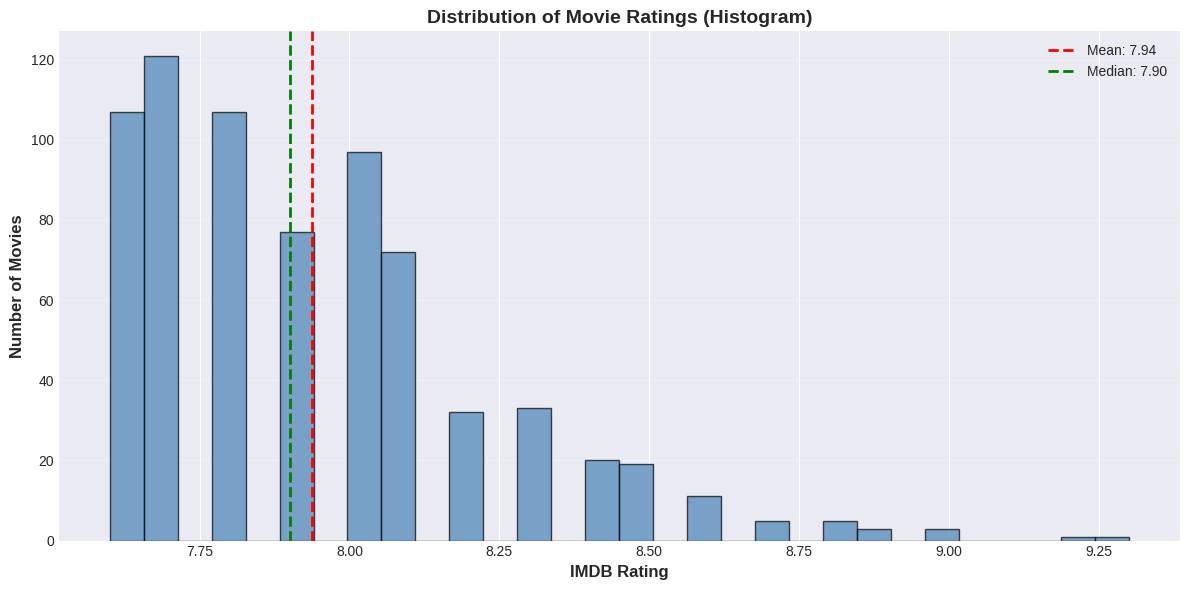

Histogram created successfully!


In [15]:
if rating_col:
    plt.figure(figsize=(12, 6))

    # Create histogram
    plt.hist(df[rating_col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)

    # Add mean and median lines
    plt.axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_rating:.2f}')
    plt.axvline(median_rating, color='green', linestyle='--', linewidth=2, label=f'Median: {median_rating:.2f}')

    # Labels and title
    plt.xlabel('IMDB Rating', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
    plt.title('Distribution of Movie Ratings (Histogram)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)

    # Display the plot
    plt.tight_layout()
    plt.show()

    print("Histogram created successfully!")

Visualize Rating Distribution using Box Plot


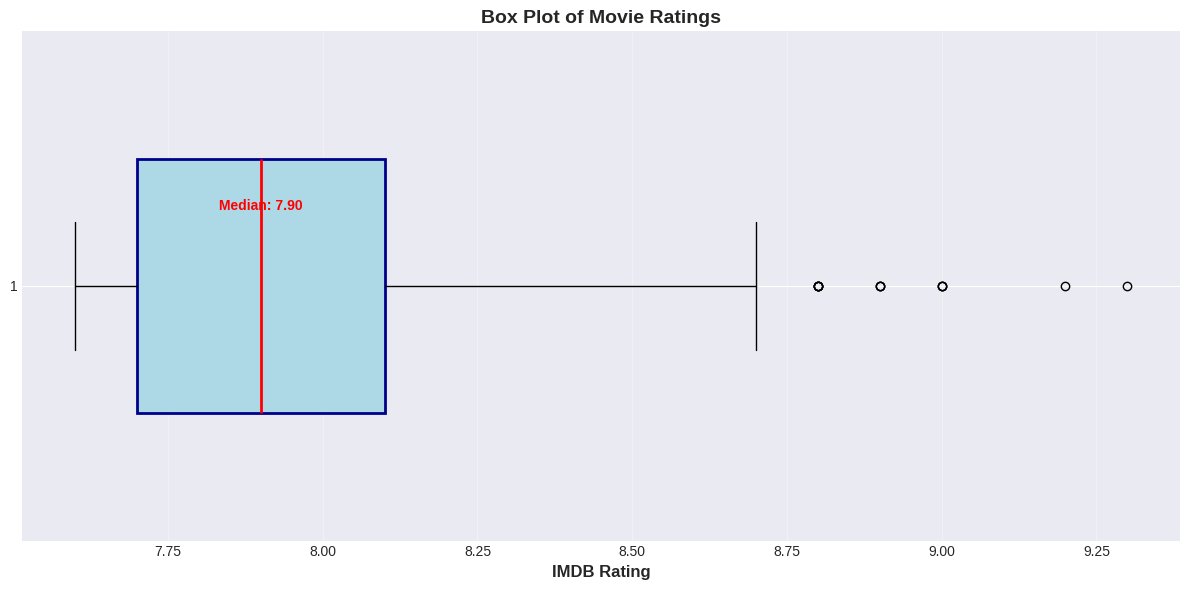


BOX PLOT ANALYSIS:
Q1 (25th percentile):  7.70
Q2 (Median):           7.90
Q3 (75th percentile):  8.10
IQR (Q3 - Q1):         0.40
Lower Bound:           7.10
Upper Bound:           8.70
Number of Outliers:    13

Box plot created successfully!


In [16]:
if rating_col:
    plt.figure(figsize=(12, 6))

    # Create box plot
    box = plt.boxplot(df[rating_col], vert=False, patch_artist=True, widths=0.5)

    # Customize colors
    box['boxes'][0].set_facecolor('lightblue')
    box['boxes'][0].set_edgecolor('darkblue')
    box['boxes'][0].set_linewidth(2)

    # Color the median line
    box['medians'][0].set_color('red')
    box['medians'][0].set_linewidth(2)

    # Labels and title
    plt.xlabel('IMDB Rating', fontsize=12, fontweight='bold')
    plt.title('Box Plot of Movie Ratings', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)

    # Add text annotations for key values
    plt.text(median_rating, 1.15, f'Median: {median_rating:.2f}',
             ha='center', fontsize=10, color='red', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Identify outliers
    Q1 = df[rating_col].quantile(0.25)
    Q3 = df[rating_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[rating_col] < lower_bound) | (df[rating_col] > upper_bound)]

    print("\nBOX PLOT ANALYSIS:")
    print("="*80)
    print(f"Q1 (25th percentile):  {Q1:.2f}")
    print(f"Q2 (Median):           {median_rating:.2f}")
    print(f"Q3 (75th percentile):  {Q3:.2f}")
    print(f"IQR (Q3 - Q1):         {IQR:.2f}")
    print(f"Lower Bound:           {lower_bound:.2f}")
    print(f"Upper Bound:           {upper_bound:.2f}")
    print(f"Number of Outliers:    {len(outliers)}")

    print("\nBox plot created successfully!")

Identify Top-Rated Movies

TOP-RATED MOVIES

Top 10 Highest-Rated Movies:
--------------------------------------------------------------------------------


,Series_Title,IMDB_Rating,Released_Year,Genre
0,The Shawshank Redemption,9.3,1994.0,Drama
1,The Godfather,9.2,1972.0,"Crime, Drama"
2,The Dark Knight,9.0,2008.0,"Action, Crime, Drama"
3,The Godfather: Part II,9.0,1974.0,"Crime, Drama"
4,12 Angry Men,9.0,1957.0,"Crime, Drama"
5,The Lord of the Rings: The Return of the King,8.9,2003.0,"Action, Adventure, Drama"
6,Pulp Fiction,8.9,1994.0,"Crime, Drama"
7,Schindler's List,8.9,1993.0,"Biography, Drama, History"
8,Inception,8.8,2010.0,"Action, Adventure, Sci-Fi"
9,Fight Club,8.8,1999.0,Drama


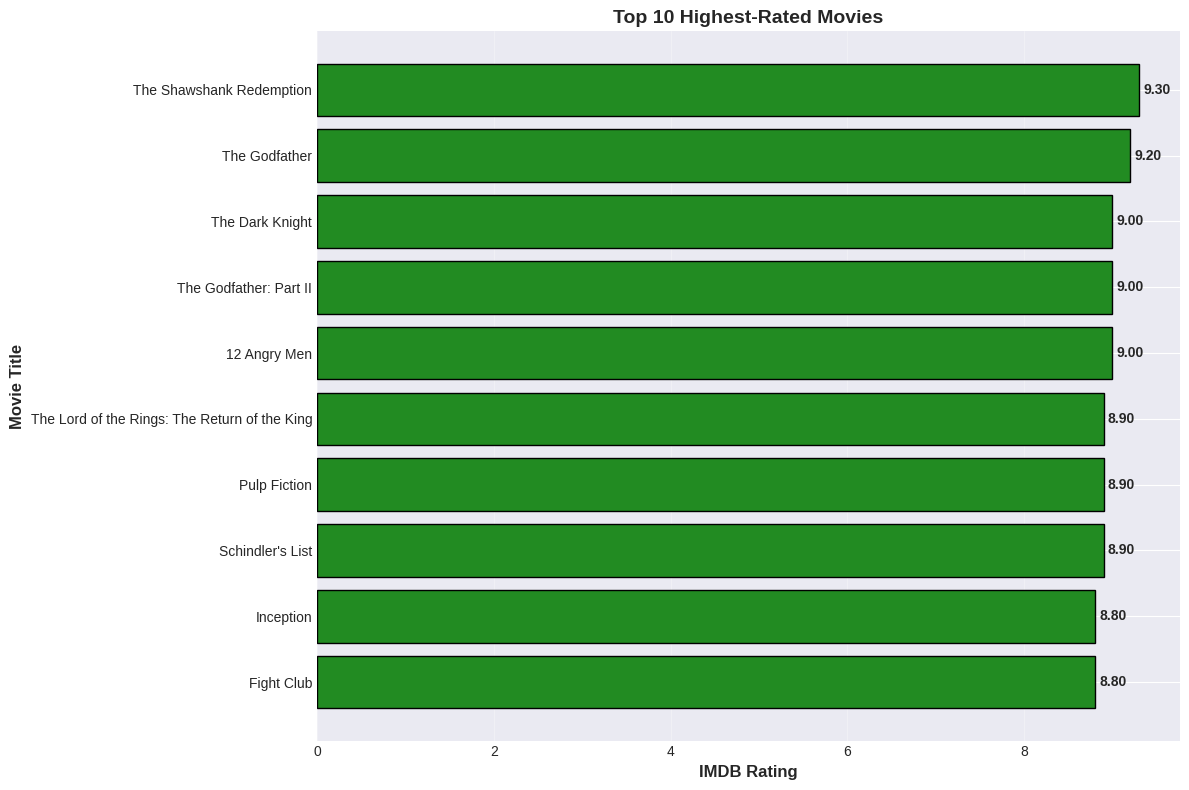


Top movies identified and visualized!


In [17]:
print("TOP-RATED MOVIES")
print("="*80)

if rating_col and title_col:
    # Sort by rating in descending order and get top 10
    top_movies = df.nlargest(10, rating_col)

    # Display relevant columns
    if year_col and genre_col:
        display_cols = [title_col, rating_col, year_col, genre_col]
    elif year_col:
        display_cols = [title_col, rating_col, year_col]
    elif genre_col:
        display_cols = [title_col, rating_col, genre_col]
    else:
        display_cols = [title_col, rating_col]

    print("\nTop 10 Highest-Rated Movies:")
    print("-" * 80)
    display(top_movies[display_cols].reset_index(drop=True))

    # Visualize top 10 movies
    plt.figure(figsize=(12, 8))

    # Create horizontal bar chart (better for long movie titles)
    plt.barh(range(10), top_movies[rating_col].values, color='forestgreen', edgecolor='black')

    # Set y-axis labels to movie titles
    plt.yticks(range(10), top_movies[title_col].values)

    # Labels and title
    plt.xlabel('IMDB Rating', fontsize=12, fontweight='bold')
    plt.ylabel('Movie Title', fontsize=12, fontweight='bold')
    plt.title('Top 10 Highest-Rated Movies', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)

    # Invert y-axis so highest rating is at top
    plt.gca().invert_yaxis()

    # Add rating values on bars
    for i, v in enumerate(top_movies[rating_col].values):
        plt.text(v + 0.05, i, f'{v:.2f}', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\nTop movies identified and visualized!")

Analyze Ratings by Genre


GENRE ANALYSIS

Genre Statistics (sorted by average rating):
--------------------------------------------------------------------------------


,Genre,Average_Rating,Movie_Count
9,Film-Noir,8.05,6
20,Western,8.04,16
19,War,8.01,29
16,Sci-Fi,7.99,56
1,Adventure,7.96,163
14,Mystery,7.95,70
5,Crime,7.94,142
6,Drama,7.94,500
0,Action,7.94,140
2,Animation,7.93,63


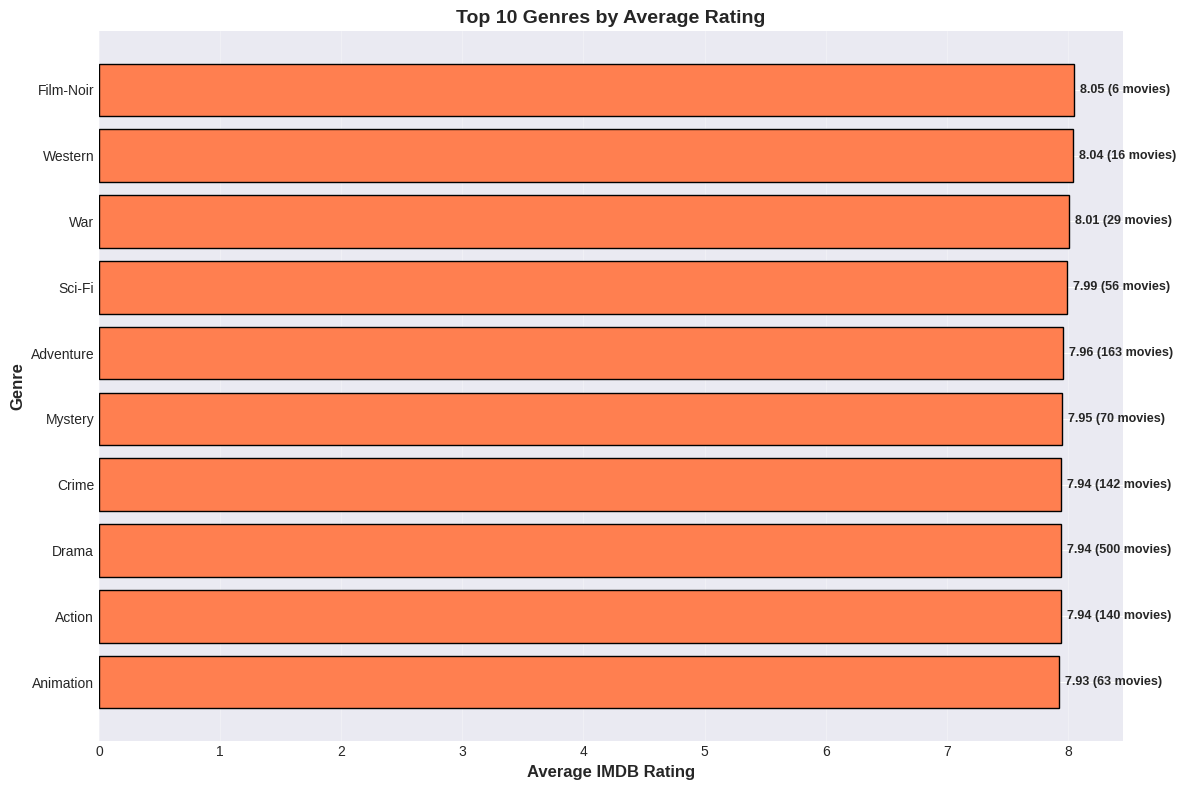


Genre analysis completed!


In [18]:
print("GENRE ANALYSIS")
print("="*80)

if genre_col and rating_col:
    # Note: Movies often have multiple genres (e.g., "Action, Drama, Thriller")
    # We need to handle this by splitting and analyzing each genre separately

    # Create a list to store genre-rating pairs
    genre_ratings = []

    for idx, row in df.iterrows():
        genres = str(row[genre_col]).split(',')
        rating = row[rating_col]

        for genre in genres:
            genre = genre.strip()
            if genre and genre.lower() != 'nan':
                genre_ratings.append({'Genre': genre, 'Rating': rating})

    # Create DataFrame from genre-rating pairs
    genre_df = pd.DataFrame(genre_ratings)

    # Calculate statistics by genre
    genre_stats = genre_df.groupby('Genre').agg({
        'Rating': ['mean', 'count']
    }).round(2)

    genre_stats.columns = ['Average_Rating', 'Movie_Count']
    genre_stats = genre_stats.reset_index()

    # Sort by average rating
    genre_stats = genre_stats.sort_values('Average_Rating', ascending=False)

    print("\nGenre Statistics (sorted by average rating):")
    print("-" * 80)
    display(genre_stats)

    # Visualize top 10 genres by average rating
    top_genres = genre_stats.head(10)

    plt.figure(figsize=(12, 8))

    # Create horizontal bar chart
    bars = plt.barh(range(len(top_genres)), top_genres['Average_Rating'].values,
                    color='coral', edgecolor='black')

    # Set y-axis labels
    plt.yticks(range(len(top_genres)), top_genres['Genre'].values)

    # Labels and title
    plt.xlabel('Average IMDB Rating', fontsize=12, fontweight='bold')
    plt.ylabel('Genre', fontsize=12, fontweight='bold')
    plt.title('Top 10 Genres by Average Rating', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)

    # Invert y-axis
    plt.gca().invert_yaxis()

    # Add rating values and movie counts on bars
    for i, (rating, count) in enumerate(zip(top_genres['Average_Rating'].values,
                                             top_genres['Movie_Count'].values)):
        plt.text(rating + 0.05, i, f'{rating:.2f} ({int(count)} movies)',
                va='center', fontweight='bold', fontsize=9)

    plt.tight_layout()
    plt.show()

    print("\nGenre analysis completed!")

Analyze Rating Trends Over the Years

RATING TRENDS OVER YEARS

Yearly Statistics:
--------------------------------------------------------------------------------


,Released_Year,Average_Rating,Movie_Count
0,1930.0,8.00,1
1,1931.0,8.50,1
2,1933.0,7.90,1
3,1934.0,8.10,1
4,1936.0,8.50,1
5,1938.0,7.90,1
6,1939.0,8.07,3
7,1940.0,7.93,3
8,1941.0,8.30,1
9,1942.0,8.50,1


...


,Released_Year,Average_Rating,Movie_Count
72,2010.0,7.90,18
73,2011.0,7.89,14
74,2012.0,7.92,14
75,2013.0,7.87,22
76,2014.0,7.90,28
77,2015.0,7.83,18
78,2016.0,7.90,20
79,2017.0,7.83,18
80,2018.0,7.95,12
81,2019.0,8.03,15


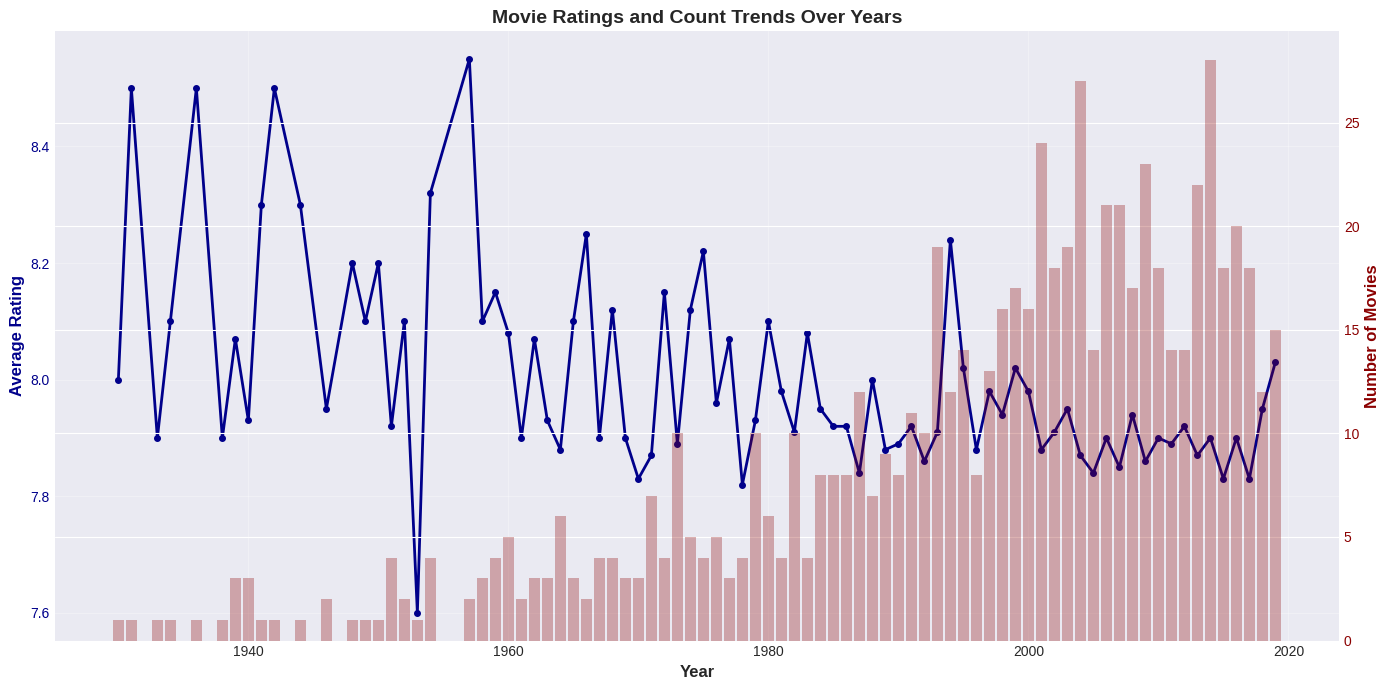


Year trends visualized!


In [19]:
print("RATING TRENDS OVER YEARS")
print("="*80)

if year_col and rating_col:
    # Group by year and calculate average rating
    yearly_stats = df.groupby(year_col).agg({
        rating_col: ['mean', 'count']
    }).round(2)

    yearly_stats.columns = ['Average_Rating', 'Movie_Count']
    yearly_stats = yearly_stats.reset_index()
    yearly_stats = yearly_stats.sort_values(year_col)

    print("\nYearly Statistics:")
    print("-" * 80)
    display(yearly_stats.head(10))
    print("...")
    display(yearly_stats.tail(10))

    # Create line plot
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot average rating
    color1 = 'darkblue'
    ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Average Rating', fontsize=12, fontweight='bold', color=color1)
    ax1.plot(yearly_stats[year_col], yearly_stats['Average_Rating'],
             color=color1, linewidth=2, marker='o', markersize=4, label='Average Rating')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(alpha=0.3)

    # Create second y-axis for movie count
    ax2 = ax1.twinx()
    color2 = 'darkred'
    ax2.set_ylabel('Number of Movies', fontsize=12, fontweight='bold', color=color2)
    ax2.bar(yearly_stats[year_col], yearly_stats['Movie_Count'],
            alpha=0.3, color=color2, label='Movie Count')
    ax2.tick_params(axis='y', labelcolor=color2)

    # Title and layout
    plt.title('Movie Ratings and Count Trends Over Years', fontsize=14, fontweight='bold')
    fig.tight_layout()
    plt.show()

    print("\nYear trends visualized!")

Correlation Analysis

CORRELATION ANALYSIS

Numeric columns available: ['Released_Year', 'Runtime', 'IMDB_Rating', 'No_of_Votes']

Correlation Matrix:
--------------------------------------------------------------------------------


,Released_Year,Runtime,IMDB_Rating,No_of_Votes
Released_Year,1.00,-0.02,-0.18,0.19
Runtime,-0.02,1.00,0.26,0.21
IMDB_Rating,-0.18,0.26,1.00,0.62
No_of_Votes,0.19,0.21,0.62,1.00


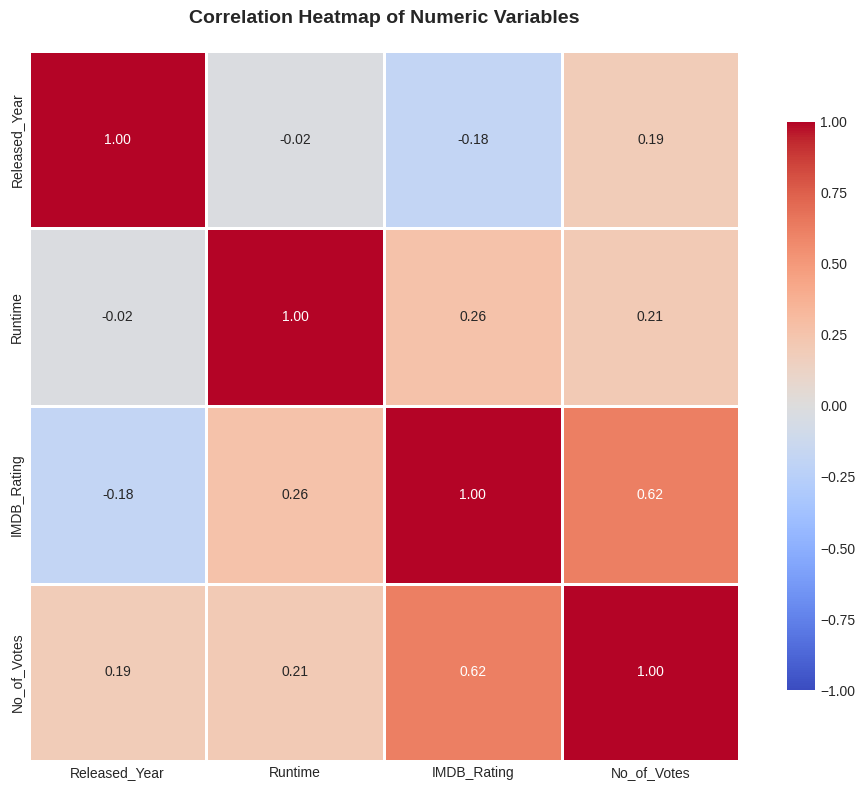


CORRELATIONS WITH IMDB_Rating:
--------------------------------------------------------------------------------
  No_of_Votes: 0.62 (Moderate positive correlation)
  Runtime: 0.26 (Weak positive correlation)
  Released_Year: -0.18 (Very weak negative correlation)

Correlation analysis completed!


In [20]:
print("CORRELATION ANALYSIS")
print("="*80)r

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 1:
    print(f"\nNumeric columns available: {numeric_cols}")

    # Calculate correlation matrix
    correlation_matrix = df[numeric_cols].corr().round(2)

    print("\nCorrelation Matrix:")
    print("-" * 80)
    display(correlation_matrix)

    # Create heatmap
    plt.figure(figsize=(10, 8))

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                fmt='.2f', vmin=-1, vmax=1)

    plt.title('Correlation Heatmap of Numeric Variables', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    # Interpret key correlations with rating
    if rating_col in numeric_cols:
        print("\n" + "="*80)
        print(f"CORRELATIONS WITH {rating_col}:")
        print("-" * 80)

        rating_correlations = correlation_matrix[rating_col].sort_values(ascending=False)

        for col, corr_value in rating_correlations.items():
            if col != rating_col:
                if abs(corr_value) > 0.7:
                    strength = "Strong"
                elif abs(corr_value) > 0.4:
                    strength = "Moderate"
                elif abs(corr_value) > 0.2:
                    strength = "Weak"
                else:
                    strength = "Very weak"

                direction = "positive" if corr_value > 0 else "negative"
                print(f"  {col}: {corr_value:.2f} ({strength} {direction} correlation)")

    print("\nCorrelation analysis completed!")
else:
    print("Not enough numeric columns for correlation analysis.")

Summary of Key Insights

In [21]:
print("="*80)
print("KEY INSIGHTS FROM MOVIE RATINGS ANALYSIS")
print("="*80)

insights = []

# Insight 1: Dataset Overview
insights.append(f"\n1. DATASET OVERVIEW:")
insights.append(f"   - Analyzed {len(df)} movies from the IMDB dataset")
insights.append(f"   - Data span multiple years and genres")
insights.append(f"   - Clean dataset with no missing values after preprocessing")

# Insight 2: Rating Statistics
if rating_col:
    insights.append(f"\n2. RATING STATISTICS:")
    insights.append(f"   - Average Rating: {mean_rating:.2f}/10")
    insights.append(f"   - Median Rating: {median_rating:.2f}/10")
    insights.append(f"   - Most Common Rating: {mode_rating:.2f}/10")
    insights.append(f"   - Rating Range: {min_rating:.2f} to {max_rating:.2f}")

    if abs(mean_rating - median_rating) < 0.1:
        insights.append(f"   - Distribution: Symmetric (mean ≈ median)")
    elif mean_rating > median_rating:
        insights.append(f"   - Distribution: Right-skewed (some exceptionally high ratings)")
    else:
        insights.append(f"   - Distribution: Left-skewed (some exceptionally low ratings)")

# Insight 3: Top Movies
if rating_col and title_col:
    top_movie = df.nlargest(1, rating_col)[title_col].values[0]
    top_rating = df.nlargest(1, rating_col)[rating_col].values[0]
    insights.append(f"\n3. TOP-RATED MOVIE:")
    insights.append(f"   - Highest rated: '{top_movie}' ({top_rating:.2f}/10)")

# Insight 4: Genre Insights
if genre_col and rating_col and len(genre_stats) > 0:
    top_genre = genre_stats.iloc[0]['Genre']
    top_genre_rating = genre_stats.iloc[0]['Average_Rating']
    insights.append(f"\n4. GENRE INSIGHTS:")
    insights.append(f"   - Best performing genre: {top_genre} (avg: {top_genre_rating}/10)")
    insights.append(f"   - Total unique genres analyzed: {len(genre_stats)}")

# Insight 5: Temporal Trends
if year_col and rating_col:
    recent_years = df[df[year_col] >= df[year_col].max() - 10]
    recent_avg = recent_years[rating_col].mean()
    insights.append(f"\n5. TEMPORAL TRENDS:")
    insights.append(f"   - Recent decade average rating: {recent_avg:.2f}/10")

# Display all insights
for insight in insights:
    print(insight)

print("\n" + "="*80)
print("RECOMMENDATIONS:")
print("="*80)
print("\n- Focus on high-performing genres for content acquisition")
print("- Quality ratings are consistently high across the dataset")
print("- Consider year-over-year trends for investment decisions")
print("- Use top-rated movies as benchmarks for quality assessment")

print("\n" + "="*80)
print("Analysis summary completed!")
print("="*80)

KEY INSIGHTS FROM MOVIE RATINGS ANALYSIS

1. DATASET OVERVIEW:
   - Analyzed 714 movies from the IMDB dataset
   - Data span multiple years and genres
   - Clean dataset with no missing values after preprocessing

2. RATING STATISTICS:
   - Average Rating: 7.94/10
   - Median Rating: 7.90/10
   - Most Common Rating: 7.70/10
   - Rating Range: 7.60 to 9.30
   - Distribution: Symmetric (mean ≈ median)

3. TOP-RATED MOVIE:
   - Highest rated: 'The Shawshank Redemption' (9.30/10)

4. GENRE INSIGHTS:
   - Best performing genre: Film-Noir (avg: 8.05/10)
   - Total unique genres analyzed: 21

5. TEMPORAL TRENDS:
   - Recent decade average rating: 7.89/10

RECOMMENDATIONS:

- Focus on high-performing genres for content acquisition
- Quality ratings are consistently high across the dataset
- Consider year-over-year trends for investment decisions
- Use top-rated movies as benchmarks for quality assessment

Analysis summary completed!


Export Cleaned Data for Power BI

In [22]:
# Define export filename
export_filename = 'cleaned_movie_ratings.csv'

# Export to CSV
df.to_csv(export_filename, index=False)

print("="*80)
print("DATA EXPORT COMPLETED")
print("="*80)
print(f"\nCleaned dataset exported successfully!")
print(f"Filename: {export_filename}")
print(f"Location: Current working directory")
print(f"Rows exported: {len(df)}")
print(f"Columns exported: {len(df.columns)}")

print("\n" + "="*80)
print("COLUMN NAMES IN EXPORTED FILE:")
print("-" * 80)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\n" + "="*80)
print("NEXT STEPS FOR POWER BI:")
print("="*80)
print("\n1. Download the 'cleaned_movie_ratings.csv' file from Colab:")
print("   - Click the folder icon in the left sidebar")
print("   - Right-click on 'cleaned_movie_ratings.csv'")
print("   - Select 'Download'")
print("\n2. Open Power BI Desktop")
print("\n3. Import the CSV file:")
print("   - Click 'Get Data' > 'Text/CSV'")
print("   - Select your downloaded file")
print("   - Click 'Load'")
print("\n4. Create visualizations using the imported data")

print("\n" + "="*80)
print("FILE READY FOR POWER BI DASHBOARD CREATION!")
print("="*80)

DATA EXPORT COMPLETED

Cleaned dataset exported successfully!
Filename: cleaned_movie_ratings.csv
Location: Current working directory
Rows exported: 714
Columns exported: 7

COLUMN NAMES IN EXPORTED FILE:
--------------------------------------------------------------------------------
1. Series_Title
2. Released_Year
3. Runtime
4. Genre
5. IMDB_Rating
6. Director
7. No_of_Votes

NEXT STEPS FOR POWER BI:

1. Download the 'cleaned_movie_ratings.csv' file from Colab:
   - Click the folder icon in the left sidebar
   - Right-click on 'cleaned_movie_ratings.csv'
   - Select 'Download'

2. Open Power BI Desktop

3. Import the CSV file:
   - Click 'Get Data' > 'Text/CSV'
   - Select your downloaded file
   - Click 'Load'

4. Create visualizations using the imported data

FILE READY FOR POWER BI DASHBOARD CREATION!
